# Lien

https://training.nextflow.io/latest/fr/hello_nextflow/00_orientation/

# Partie 1 : Hello World 

## Examiner le script et l'exécuter

In [ ]:
#!/usr/bin/env nextflow

/*
 * * Utilise echo pour imprimer 'Hello World!' dans un fichier
 */
process sayHello {

    output:
    path 'output.txt'

    script:
    """
    echo 'Hello World!' > output.txt
    """
}

workflow {

    main:
    // emmettre une salutation
    sayHello()
}


- Le premier bloc de code décrit un **processus**.

Processus = process + nom du processus + corps du {proccessus}

corps du processus = bloc de script qui spécifie la commande à exécuter, qui p-ê n'importe quoi qu'on pourrait éxécuter dans un terminal. 

Ici, nous avons un processus appelé **sayHello** qui écrit sa sortie dans un fichier nommé **output.txt**

C'est une définition de processus très minimale qui contient juste une définition de **output** et le **script** à exécuter.

La définition de output inclut le qualificateur **path**, qui indique à Nextflow que cela doit être traité comme un chemin 

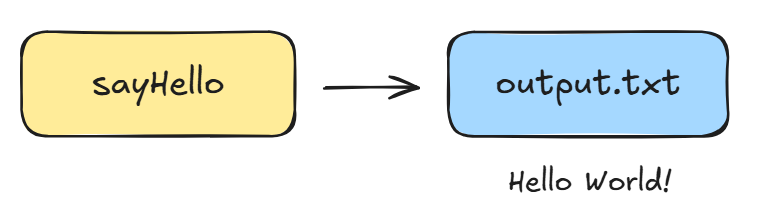



- Le deuxième bloc de code décrit le **workflow** 

Workflow = workflow + nom (opt.) + corps du {workflow}

Ici, nous avons un workflow qui consiste en un bloc main: (qui dit « ceci est le corps principal du workflow ») contenant un appel au processus sayHello.


In [ ]:
# commande pour exécuter le workflow

nextflow run hello-world.nf

# commande de sortie 

N E X T F L O W   ~  version 25.10.2

Launching `hello-world.nf` [goofy_torvalds] DSL2 - revision: c33d41f479

executor >  local (1)
[65/7be2fa] sayHello | 1 of 1 ✔ # Cela nous indique que le processus sayHello a été exécuté avec succès une fois (1 of 1 ✔).

On retrouve donc notre fichier de sorti dans le dossier work/65/7be2fa

En plus de notre fichier output.txt, on trouvera : 

.command.begin : Métadonnées liées au début de l'exécution de l'appel de processus

.command.err : Messages d'erreur (stderr) émis par l'appel de processus

.command.log : Sortie de log complète émise par l'appel de processus

.command.out : Sortie régulière (stdout) de l'appel de processus

.command.run : Script complet exécuté par Nextflow pour exécuter l'appel de processus

.command.sh : La commande qui a été réellement exécutée par l'appel de processus

.exitcode : Le code de sortie résultant de la commande



## Publier les sorties

Le fichier de sorti est donc bien caché dans des sous dossier de sous dossier ect, cela n'est pas pratique. 

Heureusement, Nextflow fournit un moyen de publier les sorties dans un répertoire désigné en utilisant des définitions de sortie au niveau du workflow.
- Un bloc **publish**: à l'intérieur du corps du workflow, déclarant les sorties de processus.
- Un bloc **output** au script spécifiant les options de sortie telles que le mode et l'emplacement.

In [ ]:
workflow {

    main:
    // émettre une salutation
    sayHello()

    publish:
    first_output = sayHello.out
}

output {
    first_output {
        path '.'
    }
}

Nextflow a créé un nouveau répertoire appelé results/.


In [ ]:
.
├── greetings.csv
├── hello-channels.nf
├── hello-config.nf
├── hello-containers.nf
├── hello-modules.nf
├── hello-workflow.nf
├── hello-world.nf
├── nextflow.config
├── results
│   └── output.txt -> /workspaces/training/hello-nextflow/work/9f/48ef97f110b0dbd83635d7cbe288d2/output.txt
├── solutions
│   ├── 1-hello-world
│   ├── 2-hello-channels
│   ├── 3-hello-workflow
│   ├── 4-hello-modules
│   ├── 5-hello-containers
│   └── 6-hello-config
├── test-params.json
└── work
    ├── 65
    └── 9f

Maintenant nous allons voir comment avoir un emplacement de sorti personaliser. Pour cela, il faut simplement modfifier le Path

In [ ]:
output {
    first_output {
        path 'hello_world'
    }
}

# sorti 

results/
├── hello_world
│   └── output.txt -> /workspaces/training/hello-nextflow/work/8c/79499c2e506b79e2e01acb808d9d12/output.txt
└── output.txt -> /workspaces/training/hello-nextflow/work/65/f56f2cd75df1352e106fcdd084b97b/output.txt

Par défaut, les sorties sont publiées comme des liens symboliques depuis le répertoire work. Cela signifie qu'il n'y a qu'un seul fichier sur le système de fichiers.

C'est très bien lorsque vous travaillez avec de très gros fichiers, pour lesquels vous ne voulez pas stocker plusieurs copies. Cependant, si vous supprimez le répertoire work à un moment donné (nous couvrirons les opérations de nettoyage sous peu), vous perdrez l'accès au fichier. Vous devez donc avoir un plan pour sauvegarder des copies de tous les fichiers importants dans un endroit sûr.

Une option facile est de basculer le mode de publication sur **copy** pour les sorties qui vous importent.

In [ ]:
output {
    first_output {
        path 'hello_world'
        mode 'copy'
    }
}

L'exemple ci-dessus peu ne pas marcher. 

Jusqu'à très récemment, la façon établie de publier les sorties était de le faire au niveau de chaque processus individuel en utilisant une directive publishDir.

Pour obtenir ce que nous venons de faire pour les sorties du processus sayHello, nous aurions plutôt ajouté la ligne suivante à la définition du processus :



In [ ]:
process sayHello {

    publishDir 'results/hello_world', mode: 'copy'

    output:
    path 'output.txt'

    script:
    """
    echo 'Hello World!' > output.txt
    """
}

 ## Utiliser une entrée variable passée en ligne de commande

 1. Ajouter un bloc input à la définition du processus 

 Pour cela nous allons modifié le process pour accepter une entrée appelée greeting 

In [ ]:
process sayHello {

    input:
    val greeting

    output:
    path 'output.txt'
}

La variable greeting est préficée par **val** pour indiqué que c'est une valeur et non un chemon

2. Modifier la commande du processus pour utiliser la variable d'entrée 

Le symbole $ et {} indiquent à Nextflow que c'est un nom de variable qui doit être remplacé par la valeur d'entrée réelle. 


In [ ]:
script:
"""
echo '${greeting}' > output.txt
"""

3. Configurer un paramètre de ligne de commande pour capturer l'entrée utilisateur 

Maintenant que le process sayHello() est prêt à acceputer une entrée variable, nous avons besoin d'un moyen de fournir une valeur d'entrée à l'appel du processus au niveau du workflow. 

On pourrait simplement le coder en dure en faissant appel au process : sayHello('Hello World!')

Cependant nous se que nous souhaitons c'est de pouvoir contrôler l'entrer dans la ligne de commande pour arriver à ceci : 


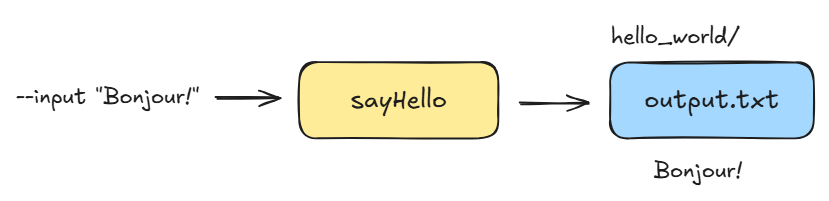

Cela tombe bien Nextflow possède un système de paramètres de workflow intéfré appelé **params**.

La synthaxe général est de déclarer **params.<nom_paramètre>** pour indiquer à nextflow d'attendre un paramètre **--<nom_paramètre>** sur la ligne de commande.

In [ ]:
workflow {

    main:
    sayHello(params.input)

    publish:
    first_output = sayHello.out
}

4. Exécuter la commande du workflow 

In [ ]:
process sayHello {

    input :
    val greeting

    output:
    path 'output.txt'

    script:
    """
    echo '${greeting}' > output.txt
    """
}

workflow {

    main:
    // emit a greeting
    sayHello(params.input)

    publish:
    first_output = sayHello.out
}

output {
    first_output {
        path 'hello_world'
        mode 'copy'
    }
}

## Ligne de commande 

nextflow run hello_world.nf --input 'Bonjour tout le monde'


5. Insérer une valeur par défault pour le paramètre 

Si dans la ligne de commande rien le paramètre input n'est pas préciser c'est la valeur par défaut qui sera pris automatiquement.

La synthaxe est nom : Type = valeur_par_defaut 

Les types supportés : String Integer Flaot Boolean Path 


In [ ]:

# Paramètre de la pipeline


params {
    input : String = 'Holà mundo!'
}

Si d'autre paramètre sont ajoutée à la pipeline, il faudra les ajouter à ce bloc qu'il est une valeur par defaut ou non.

## Gérer les exécutions de workflow 

1. Relancer un workflow avec **-resume** 

Si l'on souhait relancer un pipeline qu'on a déja lancé sans refaire les étapes qui se sont dèja terminé avec succès. 

Pour cela on a une option **-resume**. 

Dans ce mode, tout les processus qui ont déjà été exécuter avec exactement le même code, le mêmes paramètres et les mêmes entrés seront ignoré. Nextflow executera seulement les processus qui ont été ajouté ou modifié depuis la dernière exécution ou ceux a qui on a fournie de nouvelle entrée ou nouveaux paramètres. 

```
nextflow run hello-world.nf -resume 
```


2. Inspecter le journal des exécutions passées

A chaque fois qu'on lance un workflow dans nextflow, une ligne est écrite dans un fichier journal nommé **history**, sous un repertoir caché appelé **.nextflow** dans le répertoir de travail actuel. 

Ce fichier nous donne l'horodatage, le nom d'éxécution, le statut, l'ID de révision, l'ID de session et la ligne de commande pour chaque exécution nextflow qui a été lancé dans le répertoir de travail actuel. 

Une facon plus simple d'accédé a ses informations est d'utilisé la commande **nextflow log** 

Cela affiachera le contenu du fichier journal dans le termina avec une ligne d'en tête 

```
nextflow log
```



3. Supprimer les anciens répertoires de travail 

Pendant le process de créeation de pipeline, on peut engranger un grand nombre d'éxécution qui entraine de nombreux fichier dans de nombreux sous répertoires. 

Heureusement, nextflow inclut une sous commande **clean** utile qui peut automatiquement supprimer les sous repertoires de travail qu'on ne souhaite plus avoir 

- Déterminer des critères de suppresions, par exemple ici on souhaite supprimer tout les sous repertoires des exécutions avant une éxecution donnée en spécigiant sont nom d'éxécution (ici confident_bell) 

- on fait un essaie a blanc cad que qu'on va vérifier ce qui sera supprimer avec cette commande : 

```
nextflow clean -before confident_bell -n 

```

cela nous sortira tout se qui sera supprimer 

- Si tout est ok on peut procédé a la suppression, avec la commande : 


```

nextflow clean -before confident_bell -f

```


# Partie 2 : Hello Channels

Les canaux sont des files d'attente conçues pour gérer les entrées efficacement et le faire passer d'une étape à l'autre dans des workflows à plusieurs étapes, tout en fournissant un prallélisme intégré et de nombreux autres avantages. 

Dans cette parti nous apprendrons à utiliser un canal pour gérer plusieurs entrées provenant de diverses sources différentes. 
On verra aussi à utiliser des opérateurs pour transformer le contenu des canaux selon les besoins 

In [ ]:
# script de départ 

/*
 * Use echo to print 'Hello World!' to a file
 */
process sayHello {

    input:
    val greeting

    output:
    path 'output.txt'

    script:
    """
    echo '${greeting}' > output.txt
    """
}

params {
    input: String = 'Holà mundo!'
}

workflow {

    main:
    // emit a greeting
    sayHello(params.input)

    publish:
    first_output = sayHello.out
}

output {
    first_output {
        path 'hello_channels'
        mode 'copy'
    }
}


## Fournir des entrées variables via un canal explicitement 

1. Créer un canal d'entrée 

Il existe de nombreuse *fabriques de canaux** que l'on peut utiliser pour configurer un canal. 

Ici pour faire simple, pour le moment, on va utilisé le plus basique **channel.of** qui créera un canal contenant une seul valeur. 

Fonctionnellement, c'est similaire à avant mais au lieu de laisser nextflow crée un canal implicite, on le fait explicitement maintenant. 

```
greeting_ch = channel.of('Hello Channels!')
```

Cela crée un canal appelé **greeting_ch** en utilisant la fabrique de canaux channel.of(), qui configure un simple canal de file d'attente, et charge la chaîne 'Hello Channels!' à utiliser comme valeur de salutation. 


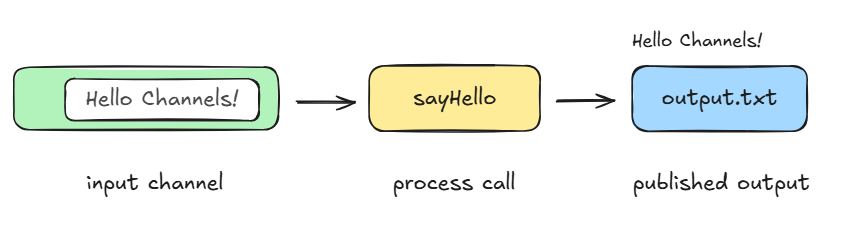



In [ ]:
workflow {

    main:
    // créer un canal pour les entrées
    greeting_ch = channel.of('Hello Channels!')
    // émettre une salutation
    sayHello(params.input)

    publish:
    first_output = sayHello.out
}

Ceci n'est pas encore fonctionnel car on n'a pas changer l'entrée vers l'appel au processus 

2. Ajouter le canal comme entrée à l'appel du processus 


Maintenant on doit brancher notre canal dans l'appel du porccesus **sayHello()**, remplacant le paramètre CLI 

In [ ]:
workflow {

    main:
    // créer un canal pour les entrées
    greeting_ch = channel.of('Hello Channels!')
    // émettre une salutation
    sayHello(greeting_ch)

    publish:
    first_output = sayHello.out
}

Maintenant notre workflow est correctement fonctionnel; c'est l'équivalent explicite d'écrire **sayHello('Hello Channels!')**

il ne reste plus qu'a le lancer 

```
nextflow run hello-channels.nf 
```

3. Utiliser **view()** pour inspecter le contenu du canal 

**view()** peut être considéré comme un outil de débogage, comme une instruction print() en Python. 

On ajoute view() au bloc comme ci dessous : 

In [ ]:
workflow {

    main:
    // créer un canal pour les entrées
    greeting_ch = channel.of('Hello Channels!')
                         .view()
    // émettre une salutation
    sayHello(greeting_ch)

    publish:
    first_output = sayHello.out
}

Une fois lancer on peut voir apparaitre le contenu du canal dans la console

```
 N E X T F L O W   ~  version 25.10.2

Launching `hello-channels.nf` [scruffy_shaw] DSL2 - revision: 2ede41e14a

executor >  local (1)
[ef/f7e40a] sayHello (1) [100%] 1 of 1 ✔
Hello Channels!

```